#### NE 255 - Homework 2, Problem 4
Daniel Hellfeld <br>
10/4/16

In [54]:
# Imports
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci

In [55]:
# Define fit function (ax^b) in lin space
def fitfunc_lin(x,b,m):
    return b * (x**m)

# Define fit function (mx + b) in log space
def fitfunc_log(x,b,m):
    return m*x + b

# Define function to calculate R^2 of lin space fit
def Rsquared_lin(popt,x,y):
    ss_res = np.sum((y - fitfunc_lin(x, *popt))**2)
    ss_tot = np.sum((y - np.mean(y))**2)

    return 1. - (ss_res/ss_tot)

# Define function to calculate R^2 of log space fit
def Rsquared_log(popt,x,y):
    ss_res = np.sum((y - fitfunc_lin(x,np.exp(popt[0]),popt[1]))**2)
    ss_tot = np.sum((y - np.mean(y))**2)

    return 1. - (ss_res/ss_tot)

In [56]:
# Input data
h    = np.array([1., 0.5, 0.1, 0.05, 0.01])
n    = np.array([8., 16., 80., 160., 800.])
erel = np.array([8.44660179e-3, 2.30286448e-3, 9.84273963e-5, 2.48043656e-5, 9.98488163e-7])

In [57]:
# Fit mesh spacing data (with linear data)
popt1, pcov1 = sci.curve_fit(fitfunc_lin, h, erel)
x1 = np.linspace(0.005,2,5000)
fit1 = fitfunc_lin(x1,*popt1)
rsquared1 = Rsquared_lin(popt1, h, erel)

# Fit mesh spacing data (with logged data)
popt2, pcov2 = sci.curve_fit(fitfunc_log, np.log(h), np.log(erel))
x2 = np.linspace(0.005,2,5000)
fit2 = fitfunc_lin(x1,np.exp(popt2[0]),popt2[1])
rsquared2 = Rsquared_log(popt2, h, erel)

# Fit cell count data (with linear data)
popt3, pcov3 = sci.curve_fit(fitfunc_lin, n, erel)
x3 = np.linspace(3,2e3,5000)
fit3 = fitfunc_lin(x3,*popt3)
rsquared3 = Rsquared_lin(popt3, n, erel)

# Fit cell count data (with logged data)
popt4, pcov4 = sci.curve_fit(fitfunc_log, np.log(n), np.log(erel))
x4 = np.linspace(3,2e3,5000)
fit4 = fitfunc_lin(x4,np.exp(popt4[0]),popt4[1])
rsquared4 = Rsquared_log(popt4, n, erel)

<IPython.core.display.Javascript object>


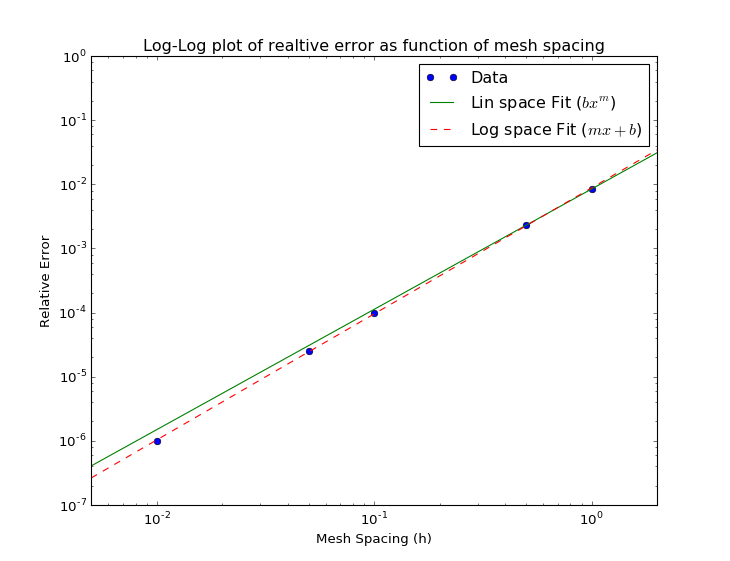

<IPython.core.display.Javascript object>


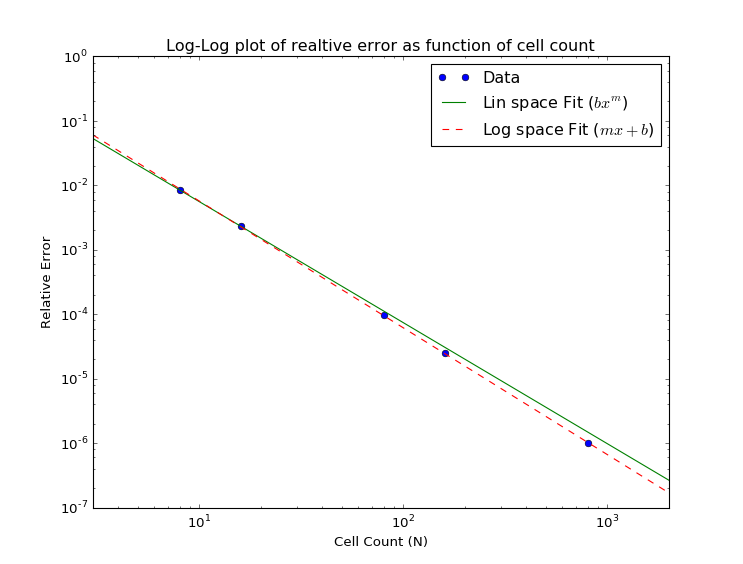

In [58]:
# Plot vs. mesh spacing
plt.figure()
plt.plot(h,erel, marker='o', linestyle='none', label='Data')
plt.plot(x1,fit1, 'g', label='Lin space Fit ($bx^m$)')
plt.plot(x2,fit2, 'r--', label='Log space Fit ($mx+b$)')
plt.xscale('log'); plt.yscale('log')
plt.xlim(0.005,2); plt.ylim(1e-7,1)
plt.xlabel("Mesh Spacing (h)"); plt.ylabel("Relative Error")
plt.title("Log-Log plot of realtive error as function of mesh spacing")
plt.legend()

# Plot vs. cell count
plt.figure()
plt.plot(n,erel, marker='o', linestyle='none', label='Data')
plt.plot(x3,fit3, 'g', label='Lin space Fit ($bx^m$)')
plt.plot(x4,fit4, 'r--', label='Log space Fit ($mx+b$)')
plt.xscale('log'); plt.yscale('log')
plt.xlim(3,2e3); plt.ylim(1e-7,1)
plt.xlabel("Cell Count (N)"); plt.ylabel("Relative Error")
plt.title("Log-Log plot of realtive error as function of cell count")
plt.legend()

plt.show()

In [59]:
print "Mesh size vs. Relative Error:\n----------------------------"
print "Lin space fit paramters:"
print "  b = %f \n  m = %f \n  R^2 = %f" % (popt1[0],popt1[1], rsquared1)
print "Log space fit paramters:"
print "  b = %f \n  m = %f \n  R^2 = %f" % (np.exp(popt2[0]),popt2[1], rsquared2)
print
print "Cell count vs. Relative Error:\n---------------------------"
print "Lin space fit paramters:"
print "  b = %f \n  m = %f \n  R^2 = %f" % (popt3[0],popt3[1], rsquared3)
print "Log space fit paramters:"
print "  b = %f \n  m = %f \n  R^2 = %f" % (np.exp(popt4[0]),popt4[1], rsquared4)

Mesh size vs. Relative Error:
----------------------------
Lin space fit paramters:
  b = 0.008447 
  m = 1.876636 
  R^2 = 0.999996
Log space fit paramters:
  b = 0.008802 
  m = 1.965841 
  R^2 = 0.997573

Cell count vs. Relative Error:
---------------------------
Lin space fit paramters:
  b = 0.418291 
  m = -1.876636 
  R^2 = 0.999996
Log space fit paramters:
  b = 0.524689 
  m = -1.965841 
  R^2 = 0.997573
